In [1]:
import numpy as np

In [2]:
from adjustText import adjust_text

In [3]:
import verdict

In [4]:
import cc.atlas as atlas

# Load

In [5]:
a = atlas.Atlas(
    './example_atlas',
    bibtex_fp='../cc/tests/data/example_atlas/example.bib',
)

Loading bibliography entries.


100%|██████████| 10/10 [00:00<00:00, 11519.65it/s]

Storing bibliography entries.
Loading saved atlas data.



100%|██████████| 10/10 [00:00<00:00, 16125.74it/s]


#### Process the bibtex notes.

In [6]:
a.data.process_bibtex_annotations( word_per_concept=True )
a.data.identify_unique_key_concepts()

Dict, {
'VandeVoort2018a' : None,
'Stern2018' : None,
'Howk2017' : None,
'Garrison-kimmel2017' : None,
'Hopkins2017' : None,
'Hafen2016' : None,
'Muratov2016' : None,
'VandeVoort2016' : None,
'Hafen2019' : None,
'Hafen2019a' : None,
}

In [7]:
a.data['Hafen2019'].process_abstract()

In [8]:
# Retrieve Atlas Data
for key, item in a.data.items():
    print( key )
    item.process_abstract()

VandeVoort2018a
Stern2018
Howk2017
Garrison-kimmel2017
Hopkins2017
Hafen2016
Muratov2016
VandeVoort2016
Hafen2019
Hafen2019a


In [9]:
saved_data = a.save_data()

100%|██████████| 10/10 [00:00<00:00, 5305.22it/s]

Preparing to save data.
Saving to ./example_atlas/atlas_data.h5


# Plot

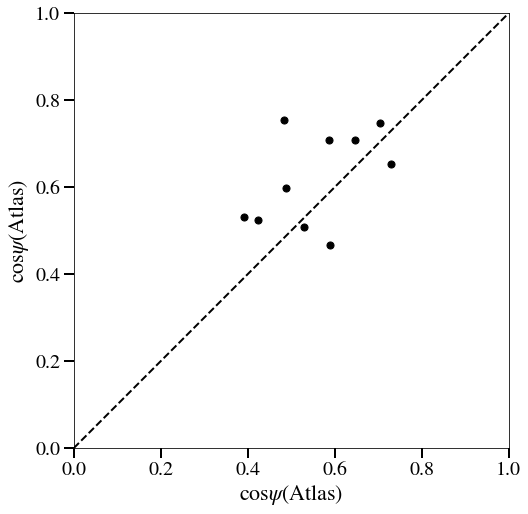

In [10]:
%matplotlib inline

figure = plt.figure( figsize=(8,8), facecolor='w' )
ax = plt.gca()

cospsi_a, cospsi_a_abs = a.plot_cospsi2d_custom(
    a,
    a,
    y_kwargs = { 'method': 'abstract similarity'},
    ax = ax,
)

ax.plot(
    [ 0, 1 ],
    [ 0, 1 ],
    linestyle = '--',
    linewidth = 2,
    color = 'k',
)

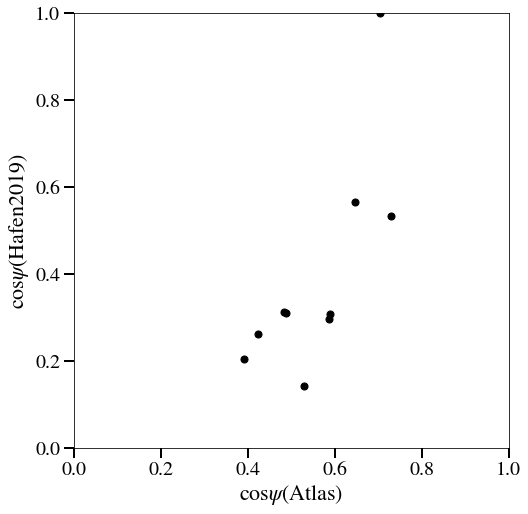

In [11]:
%matplotlib inline

cospsi_a, cospsi_h19 = a.plot_cospsi2d_custom(
    a,
    a.data['Hafen2019'],
)

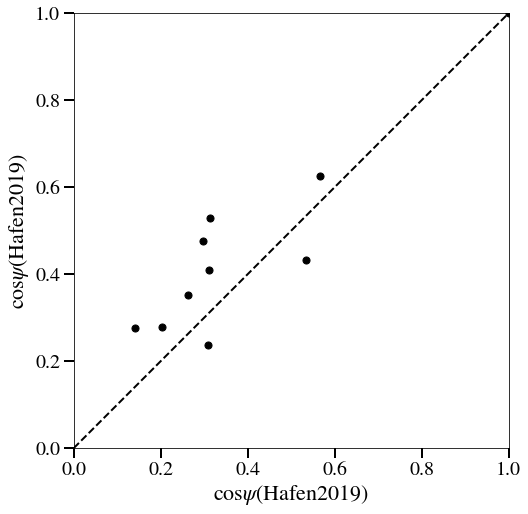

In [12]:
figure = plt.figure( figsize=(8,8), facecolor='w' )
ax = plt.gca()

cospsi_a, cospsi_h19 = a.plot_cospsi2d_custom(
    a.data['Hafen2019'],
    a.data['Hafen2019'],
    y_kwargs = { 'method': 'abstract similarity'},
    ax = ax,
)

ax.plot(
    [ 0, 1 ],
    [ 0, 1 ],
    linestyle = '--',
    linewidth = 2,
    color = 'k',
)

# Reference-Based Exploration

## Populate

#### Populate with Citing Works
Can be done iteratively.

In [13]:
# Download a bibtex file for all works that cite Hafen2019 and create a new atlas
a_H19_cit = atlas.Atlas.from_bibcodes( atlas_dir=a.atlas_dir, bibcodes=a['Hafen2019'].citations )

Loading bibliography entries.


100%|██████████| 44/44 [00:00<00:00, 24149.36it/s]

Storing bibliography entries.
Loading saved atlas data.



100%|██████████| 44/44 [00:00<00:00, 60349.70it/s]


#### Populate with Referenced Works
Can also be done iteratively.

In [14]:
# Download a bibtex file for all works that cite Hafen2019 and create a new atlas
a_H19_ref = atlas.Atlas.from_bibcodes( atlas_dir=a.atlas_dir, bibcodes=a['Hafen2019'].references )

Loading bibliography entries.


100%|██████████| 212/212 [00:00<00:00, 27880.49it/s]

Storing bibliography entries.
Loading saved atlas data.



100%|██████████| 211/211 [00:00<00:00, 280951.79it/s]


#### Alternatively, import to the existing atlas

In [15]:
len( list( a.data.keys() ) )

10

In [16]:
a.import_bibcodes( a['Hafen2019'].citations )

Loading bibliography entries.


100%|██████████| 256/256 [00:00<00:00, 30545.68it/s]

Storing bibliography entries.
Loading saved atlas data.



100%|██████████| 211/211 [00:00<00:00, 112167.07it/s]


In [17]:
len( list( a.data.keys() ) )

214

## Process Data

#### Project into concept space for fast subsequent calculations

In [24]:
cp = a.concept_projection(overwrite=True)

 55%|█████▍    | 117/214 [00:00<00:00, 1161.88it/s]

Generating concept projection...


100%|██████████| 214/214 [00:00<00:00, 641.33it/s] 
/Users/zhafen/repos/cc/cc/atlas.py:517: RuntimeWarning: invalid value encountered in true_divide
  components_normed = components / norm[:,np.newaxis]


* Allow updating of the matrix when the set of concept basis vectors are increased

## Visualize

Generating concept projection...
Using saved concept projection...
Generating concept projection...
Using saved concept projection...
Generating concept projection...
Using saved concept projection...
Generating concept projection...
Using saved concept projection...
Generating concept projection...
Using saved concept projection...
Generating concept projection...
Using saved concept projection...


/Users/zhafen/repos/cc/cc/atlas.py:717: RuntimeWarning: invalid value encountered in true_divide
  cospsi_xs = ip_xall / np.sqrt( ip_xs * ip_xallall )
/Users/zhafen/repos/cc/cc/atlas.py:718: RuntimeWarning: invalid value encountered in true_divide
  cospsi_ys = ip_yall / np.sqrt( ip_ys * ip_yallall )


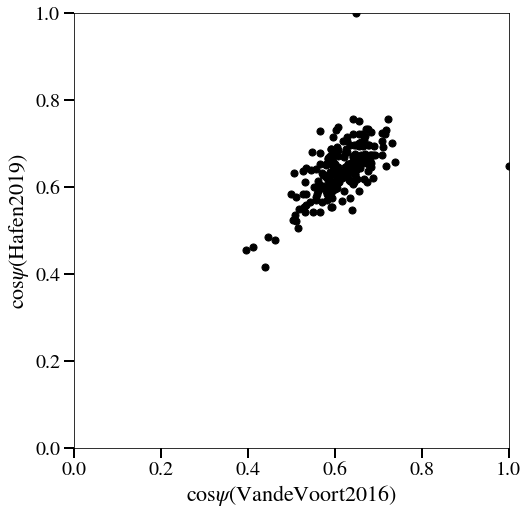

In [34]:
%matplotlib inline

cospsi_a, cospsi_h19 = a.plot_cospsi2d(
    'VandeVoort2016',
    'Hafen2019',
)

Plot that shows cosPsi for both referenced and cited works.

$\cos \Psi$ for
* central works
* a couple of concept vectors
* the vector that describes your upcoming publication
* a vector that predicts high citability 

## Select

## Read

### Download Full Text from ArXiv

### Open PDF/Mendeley Externally
While this might seem excessive, QoL differences like this are important.

### Open Figures in NB

### Natural Language Processing of Text to Create a Summary PDF